### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
# prepare data

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time


iris = datasets.load_iris()
X = iris.data[:, 2:]  # only take the first two features.
y = iris.target  

In [2]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# split dataset - implement train_test_split from scratch
idx = np.arange(0,len(X),1)
#print(idx)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [7]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

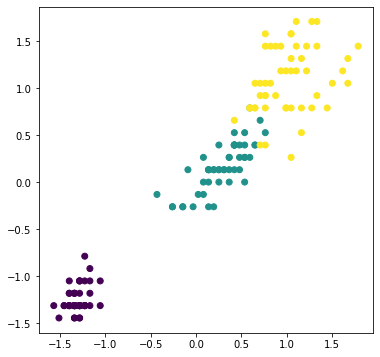

In [11]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [26]:
# Fit the data

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        #w = np.random.rand(n, k)
        self.w = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                if i % 500 == 0:
                    print("Loss at iteration", i, ":", loss)
            print()
            print("Time taken:", time.time() - start_time)
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                if i % 500 == 0:
                    print("Loss at iteration",i,":", loss)
            print()
            print("Time taken:", time.time() - start_time)
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.w = self.w - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print("Loss at iteration:",i,":", loss)
            print()
            print("Time taken:", time.time() - start_time)
            
        else:
            raise ValueError('Methos should be "batch", "minibatch" or "sto"')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.w)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, w):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ w)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.w), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

### Evaluationg Batch Method

Loss at iteration 0 : 1.370022546334368
Loss at iteration 500 : 0.18136570291135942
Loss at iteration 1000 : 0.13544142193305586
Loss at iteration 1500 : 0.11641938777185606
Loss at iteration 2000 : 0.10556912864682894
Loss at iteration 2500 : 0.09837233376201467
Loss at iteration 3000 : 0.09316349747019258
Loss at iteration 3500 : 0.08917504193262113
Loss at iteration 4000 : 0.08599943240098858
Loss at iteration 4500 : 0.08339785930716537
Loss at iteration 5000 : 0.08121980679489495
Loss at iteration 5500 : 0.07936495327964052
Loss at iteration 6000 : 0.07776341902721387
Loss at iteration 6500 : 0.07636477072995422
Loss at iteration 7000 : 0.07513153724831162
Loss at iteration 7500 : 0.07403519841334469
Loss at iteration 8000 : 0.07305360174165637
Loss at iteration 8500 : 0.0721692406867109
Loss at iteration 9000 : 0.07136807273653407
Loss at iteration 9500 : 0.07063868707824561

Time taken: 0.3413655757904053

Classification report: 
              precision    recall  f1-score   supp

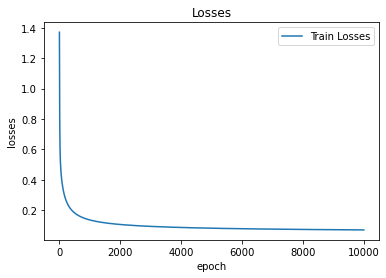

In [28]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print()
print("Classification report: ")
print(classification_report(y_test, yhat))

### Evaluating MIniBatch method

Loss at iteration 0 : 1.506575720641396
Loss at iteration 500 : 0.2964042422378085
Loss at iteration 1000 : 0.27939060051302894
Loss at iteration 1500 : 0.23867945415887093
Loss at iteration 2000 : 0.14042805676680323
Loss at iteration 2500 : 0.16602983150167552
Loss at iteration 3000 : 0.16945647568838035
Loss at iteration 3500 : 0.20557339249576023
Loss at iteration 4000 : 0.06260166562647705
Loss at iteration 4500 : 0.12235275369822433
Loss at iteration 5000 : 0.1332085541542296
Loss at iteration 5500 : 0.01656645552578916
Loss at iteration 6000 : 0.015344798041391812
Loss at iteration 6500 : 0.040991609775012164
Loss at iteration 7000 : 0.11906982985306896
Loss at iteration 7500 : 0.06684687504012654
Loss at iteration 8000 : 0.03639698208990056
Loss at iteration 8500 : 0.17221752156042458
Loss at iteration 9000 : 0.02940135581867655
Loss at iteration 9500 : 0.1116900718059076

Time taken: 0.31627440452575684

Classification report: 
              precision    recall  f1-score   sup

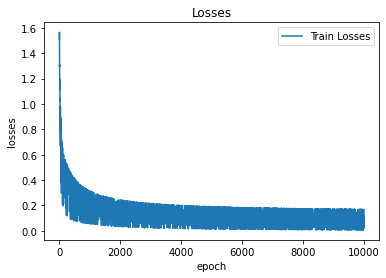

In [23]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print()
print("Classification report: ")
print(classification_report(y_test, yhat))

### Evaluating Stochastic method

Loss at iteration: 0 : 0.5062047299388723
Loss at iteration: 500 : 0.32793750292862245
Loss at iteration: 1000 : 1.3246482351886637
Loss at iteration: 1500 : 0.5367931414759096
Loss at iteration: 2000 : 0.35104869600316596
Loss at iteration: 2500 : 0.21868310007458333
Loss at iteration: 3000 : 1.085038250734505
Loss at iteration: 3500 : 0.15702789808684595
Loss at iteration: 4000 : 1.014053142277819
Loss at iteration: 4500 : 0.17712214849003213
Loss at iteration: 5000 : 0.13170124695248028
Loss at iteration: 5500 : 0.8669511696133777
Loss at iteration: 6000 : 0.10379361917105107
Loss at iteration: 6500 : 0.79142782351837
Loss at iteration: 7000 : 0.7643049894837913
Loss at iteration: 7500 : 0.7244021032491009
Loss at iteration: 8000 : 0.39546077130657475
Loss at iteration: 8500 : 0.1692477317400505
Loss at iteration: 9000 : 0.6831962129528169
Loss at iteration: 9500 : 0.1617982884338439

Time taken: 0.31312012672424316

Classification report: 
              precision    recall  f1-scor

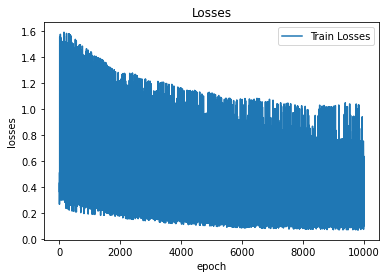

In [27]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print()
print("Classification report: ")
print(classification_report(y_test, yhat))

In [25]:
model = LogisticRegression(k, X_train.shape[1], "no-method")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print()
print("Classification report: ")
print(classification_report(y_test, yhat))

ValueError: Methos should be "batch", "minibatch" or "sto"

### Discussion

#### batch
Loss at iteration 9500 : 0.07063868707824561
Time taken: 0.3413655757904053

#### minibatch
Loss at iteration 9500 : 0.1116900718059076
Time taken: 0.31627440452575684

#### stochastic
Loss at iteration: 9500 : 0.1617982884338439
Time taken: 0.31312012672424316